In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [18]:
#Basic Statistics
df = pd.read_csv('data/2008_swing_states.csv')

print(np.mean(df.dem_share))
print(np.median(df.dem_share))
print(np.var(df.dem_share))
print(np.std(df.dem_share))

43.76441441441442
43.185
114.24649492735979
10.688615201575917


  state           county  total_votes  dem_votes  rep_votes  dem_share
0    PA      Erie County       127691      75775      50351      60.08
1    PA  Bradford County        25787      10306      15057      40.64
2    PA     Tioga County        17984       6390      11326      36.07
3    PA    McKean County        15947       6465       9224      41.21
4    PA    Potter County         7507       2300       5109      31.04


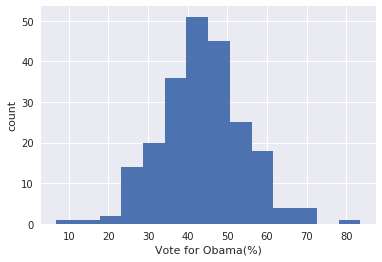

In [5]:
df = pd.read_csv('data/2008_swing_states.csv')

print(df.head())

sns.set()

n_bins = int(np.sqrt(len(df['dem_share'])))

_ = plt.hist(df['dem_share'],bins=n_bins)
_ = plt.xlabel('Vote for Obama(%)')
_ = plt.ylabel('count')

plt.show()

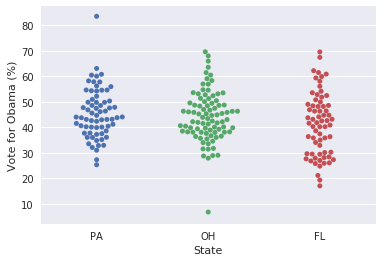

In [6]:
df_swing = pd.read_csv('data/2008_swing_states.csv')
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('State')
_ = plt.ylabel('Vote for Obama (%)')
_ = plt.show()

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data) 

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

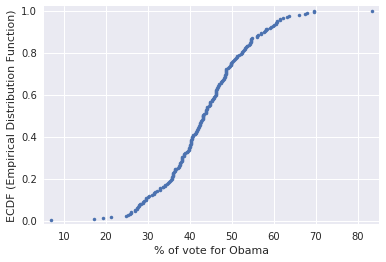

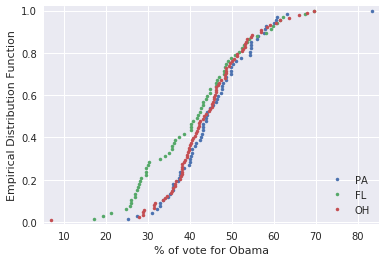

In [16]:
#ECDF
df_swing = pd.read_csv('data/2008_swing_states.csv')

x_vers, y_vers = ecdf(df_swing.dem_share)

# Generate plot
_ = plt.plot(x_vers,y_vers, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.ylabel('ECDF (Empirical Distribution Function)')
_ = plt.xlabel('% of vote for Obama')

# Display the plot
plt.show()
plt.clf()

x_pa, y_pa = ecdf(df_swing[df_swing['state']=='PA'].dem_share)
x_fl, y_fl = ecdf(df_swing[df_swing['state']=='FL'].dem_share)
x_oh, y_oh = ecdf(df_swing[df_swing['state']=='OH'].dem_share)

_ = plt.plot(x_pa,y_pa, marker='.', linestyle='none')
_ = plt.plot(x_fl,y_fl, marker='.', linestyle='none')
_ = plt.plot(x_oh,y_oh, marker='.', linestyle='none')
_ = plt.margins(0.02)
plt.legend(('PA', 'FL', 'OH'), loc='lower right')
_ = plt.ylabel('Empirical Distribution Function')
_ = plt.xlabel('% of vote for Obama')

[25.58675 37.3025  43.185   49.925   64.7195 ]


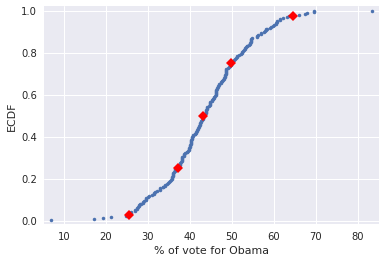

In [13]:
#ECDF
df_swing = pd.read_csv('data/2008_swing_states.csv')

percentiles = np.array([2.5,25,50,75,97.5])

ptiles_all = np.percentile(df_swing['dem_share'],percentiles)

print(ptiles_all)

# Plot the ECDF
x_vers, y_vers = ecdf(df_swing.dem_share)
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('% of vote for Obama')
_ = plt.ylabel('ECDF')

#Nesse ponto, eu to colocando um plot em cima do outro, no caso, os diamantes(D) marcando os percentis
_ = plt.plot(ptiles_all, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.show()

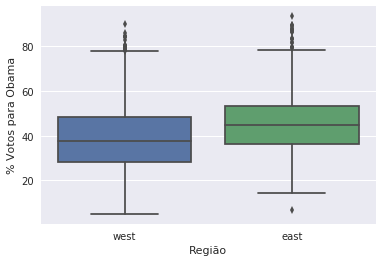

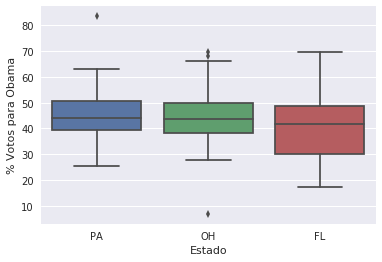

In [15]:
#BoxPlot

df = pd.read_csv('data/2008_all_states.csv')

_ = sns.boxplot(x='east_west', y='dem_share', data=df)
_ = plt.xlabel('Região')
_ = plt.ylabel('% Votos para Obama')

plt.show()
plt.clf()

df = pd.read_csv('data/2008_swing_states.csv')
_ = sns.boxplot(x='state', y='dem_share', data=df)
_ = plt.xlabel('Estado')
_ = plt.ylabel('% Votos para Obama')

In [21]:
def get_iris_df():
    """ Return the Load Iris as Pandas DataFrame """
    
    from sklearn.datasets import load_iris

    data = load_iris()
    #df = pd.DataFrame(data.data, columns=data.feature_names)
    df_iris= pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

    df_iris['species'] = pd.Categorical.from_codes(data.target, data.target_names)
    
    return df_iris

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  


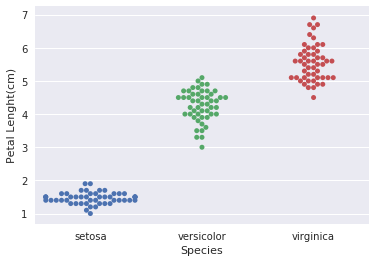

In [23]:
df_iris = get_iris_df()
print(df_iris.head())

_ = sns.swarmplot(x='species',y='petal length (cm)',data=df_iris)

# Label the axes
_ = plt.xlabel('Species')
_ = plt.ylabel('Petal Lenght(cm)')

# Show the plot
plt.show()

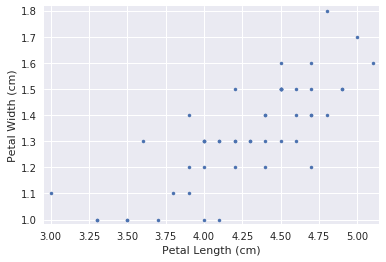

In [25]:
#Scatter Plot
df_iris = get_iris_df()

# Make a scatter plot
_ = plt.plot(df_iris[df_iris['species'] == 'versicolor']['petal length (cm)'], df_iris[df_iris['species'] == 'versicolor']['petal width (cm)'], marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Petal Length (cm)')
_ = plt.ylabel('Petal Width (cm)')

# Show the result
plt.show()

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y

In [30]:
#Calculate covariance

versicolor_petal_length = df_iris[df_iris['species'] == 'versicolor']['petal length (cm)']
versicolor_petal_width = df_iris[df_iris['species'] == 'versicolor']['petal width (cm)']

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Print the length/width covariance
print(covariance_matrix[0,1])

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In [31]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
